In [1]:
import pandas as pd
import numpy as np  

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("I have imported the data")
df.head(10)

I have imported the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking for messy data!

In [4]:
df[df.Scores > 100]

,Hours,Scores


In [5]:
df[df.Scores < 0]

,Hours,Scores


In [6]:
df[df.Hours < 0]

,Hours,Scores


In [7]:
#EDA

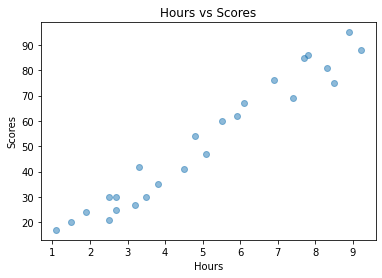

In [8]:
import matplotlib.pyplot as plt  
x = df["Hours"]
y = df["Scores"]
plt.scatter(x, y,  alpha=0.5)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [9]:
# As you can see, there is a linear relationship between the Hours and the Percentage Scores!

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
#Creating a model

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [13]:
print('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.0181600414346974


In [14]:
y_pred = model.predict(X_test)

In [15]:
#Graph

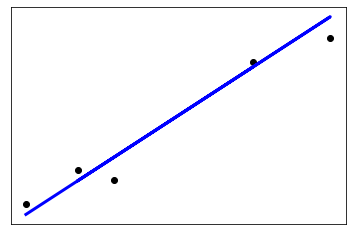

In [16]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Prediction

In [19]:
hr = 9.25
prediction = 9.91065648 * hr + model.intercept_

In [20]:
prediction

93.6917324814347

In [21]:
#Error!

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Coefficient of determination: 0.95
Mean Absolute Error: 4.183859899002975
